# 线性调频信号---Chirp Signal

##  时域表达

线性调频信号的复数形式为： $s(t) = rect(\frac{t}{T})exp\{jKt^2\}$

其中 是时间变量(单位为s)， 是脉冲持续时间(单位为s)， 是线性调频率(单位为Hz/s)，由于频率的线性调制，相位是时间的二次函数。

线性调频信号还有一个重要参数，那就是时间带宽积：TBP = $|K|T^2$ 。

In [54]:
import numpy as np
import matplotlib.pyplot as plt
# plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

from numpy import pi,abs,max,min,argmax,argmin,ceil,exp,sqrt,real,imag,conj,sinc,sin,cos,tan,arctan,angle,unwrap
from numpy import linspace,arange,zeros,ones,concatenate
from numpy.fft import fft,fftshift,ifft,ifftshift,fft2
from matplotlib.pyplot import figure,subplot,plot,axis,title,suptitle,xlabel,ylabel,text,arrow,tight_layout

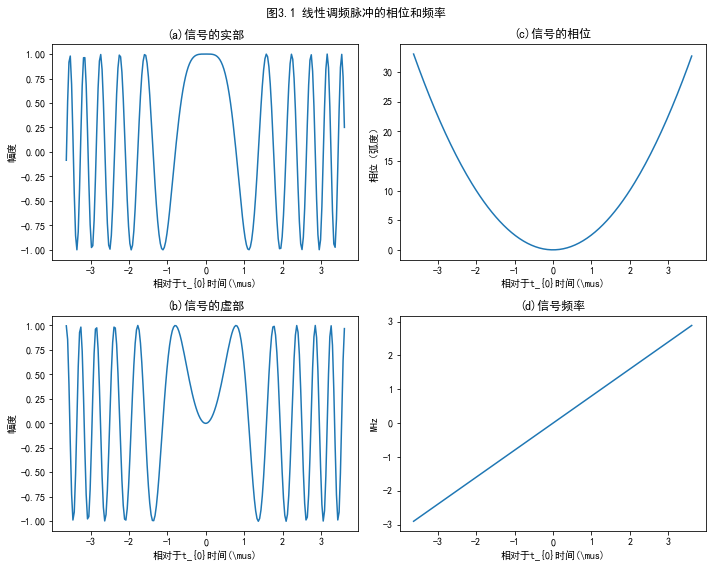

In [55]:
B = 5.80e+6;           # 信号带宽
T = 7.26e-6;           # 脉冲持续时间
# 参数计算
K = B/T;               # 线性调频频率
alpha_os = 5;          # 过采样率
F = alpha_os*B;        # 采样频率
N = F*T;               # 采样点数
dt = T/N;              # 采样时间间隔
# 变量设置
t =  arange(-T/2,T/2,dt);    # 时间变量
# 信号表达
st =  exp(1j* pi*K*t**2);           # 瞬时相位
# 其他参数
f = K*t;                   # 瞬时频率
phi =  pi*K*t**2         # 瞬时相位
# 画图
figure(figsize=(10, 8))
subplot(2,2,1)
plot(t*1e6, real(st));
title('(a)信号的实部');xlabel('相对于t_{0}时间(\mus)');ylabel('幅度');
subplot(2,2,2)
plot(t*1e6,phi);
title('(c)信号的相位');xlabel('相对于t_{0}时间(\mus)');ylabel('相位（弧度）');
subplot(2,2,3);
plot(t*1e6, imag(st));
title('(b)信号的虚部');xlabel('相对于t_{0}时间(\mus)');ylabel('幅度');
subplot(2,2,4);
plot(t*1e6,f*1e-6);
title('(d)信号频率');xlabel('相对于t_{0}时间(\mus)');ylabel('MHz');
suptitle('图3.1 线性调频脉冲的相位和频率')
tight_layout()

## 频谱分析

利用驻定相位原理（POSP），线性调频信号的频谱为：
$$G(f) = rect(\frac{f}{KT})exp\{-j\pi\frac{f^2}{K}\}$$

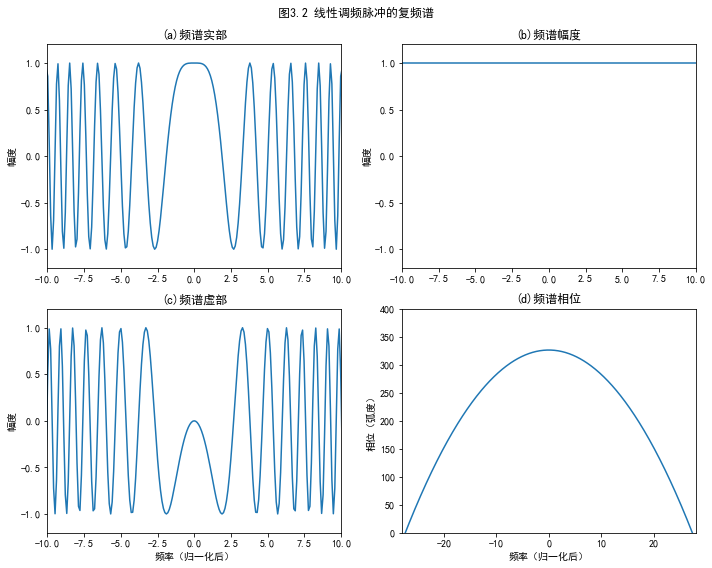

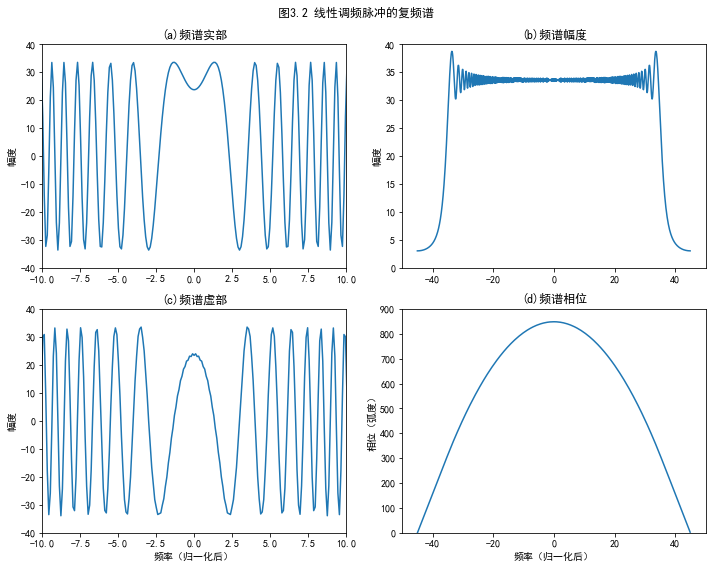

In [56]:
from numpy.fft import fft,fftshift
# 参数设置
TBP = 720;             # 时间带宽积
T = 10e-6;             # 脉冲持续时间
# 参数计算
B = TBP/T;             # 信号带宽
K = B/T;               # 线性调频频率
alpha_os = 1.25;       # 过采样率
F = alpha_os*B;        # 采样频率
N = int(2*ceil(F*T/2));     # 采样点数
dt = T/N;              # 采样时间间隔
df = F/N;              # 采样频率间隔
# 变量设置
t = arange(-T/2,T/2,dt);    # 时间变量
f = arange(-F/2,F/2,df);    # 频率变量
# 信号表达
st = exp(1j*pi*K*t**2);             # Chirp信号表达式
Sf1 = exp(-1j*pi*f**2/K)
Sf2 = fftshift(fft(fftshift(st)));    # Chirp信号频谱表达式

figure(figsize=(10, 8))
subplot(2,2,1)
plot(f*1e-6,real(Sf1));axis([-10,10,-1.2,1.2]);
title('(a)频谱实部');ylabel('幅度');
subplot(2,2,2)
plot(f*1e-6,abs(Sf1));axis([-10,10,-1.2,1.2]);
title('(b)频谱幅度');ylabel('幅度');
subplot(2,2,3);
plot(f*1e-6,imag(Sf1));axis([-10,10,-1.2,1.2]);
title('(c)频谱虚部');xlabel('频率（归一化后）');ylabel('幅度');
subplot(2,2,4);
plot(f*1e-6,unwrap(angle(Sf1)));axis([-28,28,0,400]);
title('(d)频谱相位');xlabel('频率（归一化后）');ylabel('相位（弧度）');
suptitle('图3.2 线性调频脉冲的复频谱')
tight_layout()

figure(figsize=(10, 8))
subplot(2,2,1)
plot(f*1e-6,real(Sf2));axis([-10,10,-40,40]);
title('(a)频谱实部');ylabel('幅度');
subplot(2,2,2)
plot(f*1e-6,abs(Sf2));axis([-50,50,0,40]);
title('(b)频谱幅度');ylabel('幅度');
subplot(2,2,3);
plot(f*1e-6,imag(Sf2));axis([-10,10,-40,40]);
title('(c)频谱虚部');xlabel('频率（归一化后）');ylabel('幅度');
subplot(2,2,4);
plot(f*1e-6,unwrap(angle(Sf2)));axis([-50,50,0,900]);
title('(d)频谱相位');xlabel('频率（归一化后）');ylabel('相位（弧度）');
suptitle('图3.2 线性调频脉冲的复频谱')
tight_layout()

### 一些重要的频谱性质如下：

  - 图3.2(a)与图3.2(c)所示的频谱实部和虚部与图3.1(a)与图3.1(c)所示的实部和虚部具有相似的线性调频结构，与时域相比，不同之处在于存在 的相变和调频斜率符号的改变。
  - 图3.2(b)的包络与图3.1所示时域信号的矩形包络近似一致，也就是说，两个域中的包络近似不变。(幅度谱的陡降源自1.25倍的时间过采样。)
  - 图3.2(d)中频域相位与时域相位相同，基本都是二次的，这意味着频时关系为 ，表明线性调频信号中的频率与时间之间存在着一一对应的线性关系。

驻定相位原理只是一种近似，然而，如果线性调频信号的周期足够多，这种方法对于分析来说是足够精确的。信号周期数为TBP/4，也就是说，当TBP值大于100时，POSP是相当准确的。

Text(0.5, 0.98, '图3.3 不同TBP值的离散傅里叶变换频谱变化')

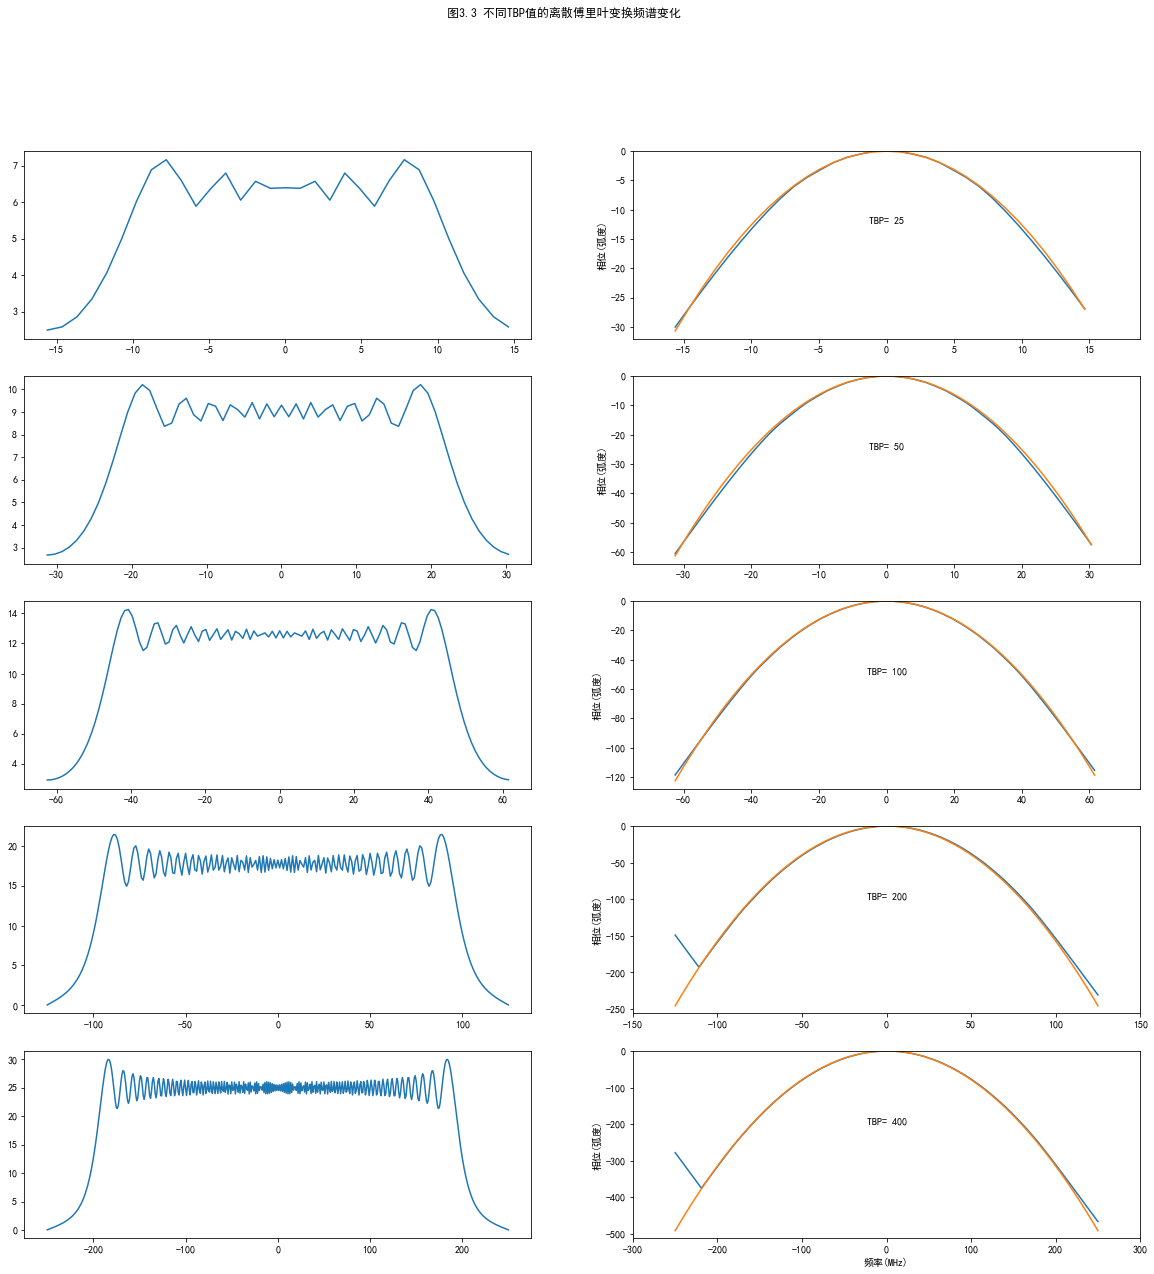

In [61]:
# 参数设置
TBP = [25,50,100,200,400]; # 时间带宽积
T = 1e-6;                  # 脉冲持续时间

figure(figsize=(20, 20))
for i in  range(len(TBP)):
    # 参数计算
    B = TBP[i]/T;          # 信号带宽
    K = B/T;               # 线性调频频率
    alpha_os = 1.25;       # 过采样率
    F = alpha_os*B;        # 采样频率
    N = int(2*ceil(F*T/2));     # 采样点数
    dt = T/N;              # 采样时间间隔
    df = F/N;              # 采样频率间隔
    # 变量设置
    t = arange(-T/2,T/2,dt);    # 时间变量
    f = t*F/T;    # 频率变量
    # 信号表达
    st = exp(1j*pi*K*t**2)
    Sf = fftshift( fft( fftshift( st ) ) )
    subplot( 5, 2, 2*i+1 );
    plot( f*1e-6, abs(Sf))
    subplot( 5, 2, 2*i+2 );
    plot( f*1e-6, unwrap(angle(Sf))-max(unwrap(angle(Sf))),f*1e-6,(-pi*f**2/K-max(-pi*f**2/K)) )
    axis([-F*1e-6/2-F*1e-6/10,F*1e-6/2+F*1e-6/10,-32*2**i,0]);
    #ylabel('幅度'); grid( )
    if(i==4):
        xlabel('频率(MHz)')
    ylabel('相位(弧度)')
    text(0,-TBP[i]/2,'TBP= '+str(TBP[i]),horizontalalignment='center')

suptitle('图3.3 不同TBP值的离散傅里叶变换频谱变化')



## 信号采样

为了衡量能量间隙的相对大小，定义过采样因子： 
过采样因子越大，则能量间隙越大，此时采样率高于必须值，需要额外的存储和计算，以进行信号处理。(能量间隙也可以看成是未被利用的频谱空间。)

通常，为既能有效地利用数据采样点，又能留有足够的频谱间隙，过采样因子应选在1.1~1.4之间。当存在明显的间隙时，可以对样本进行精确的信号处理(如对连续信号的精确重建)。

Text(0.5, 0.98, '图3.4 过采样率\x07lpha_{os}在频谱中引起的能量间隙')

d:\anaconda3\envs\stock\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 7 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


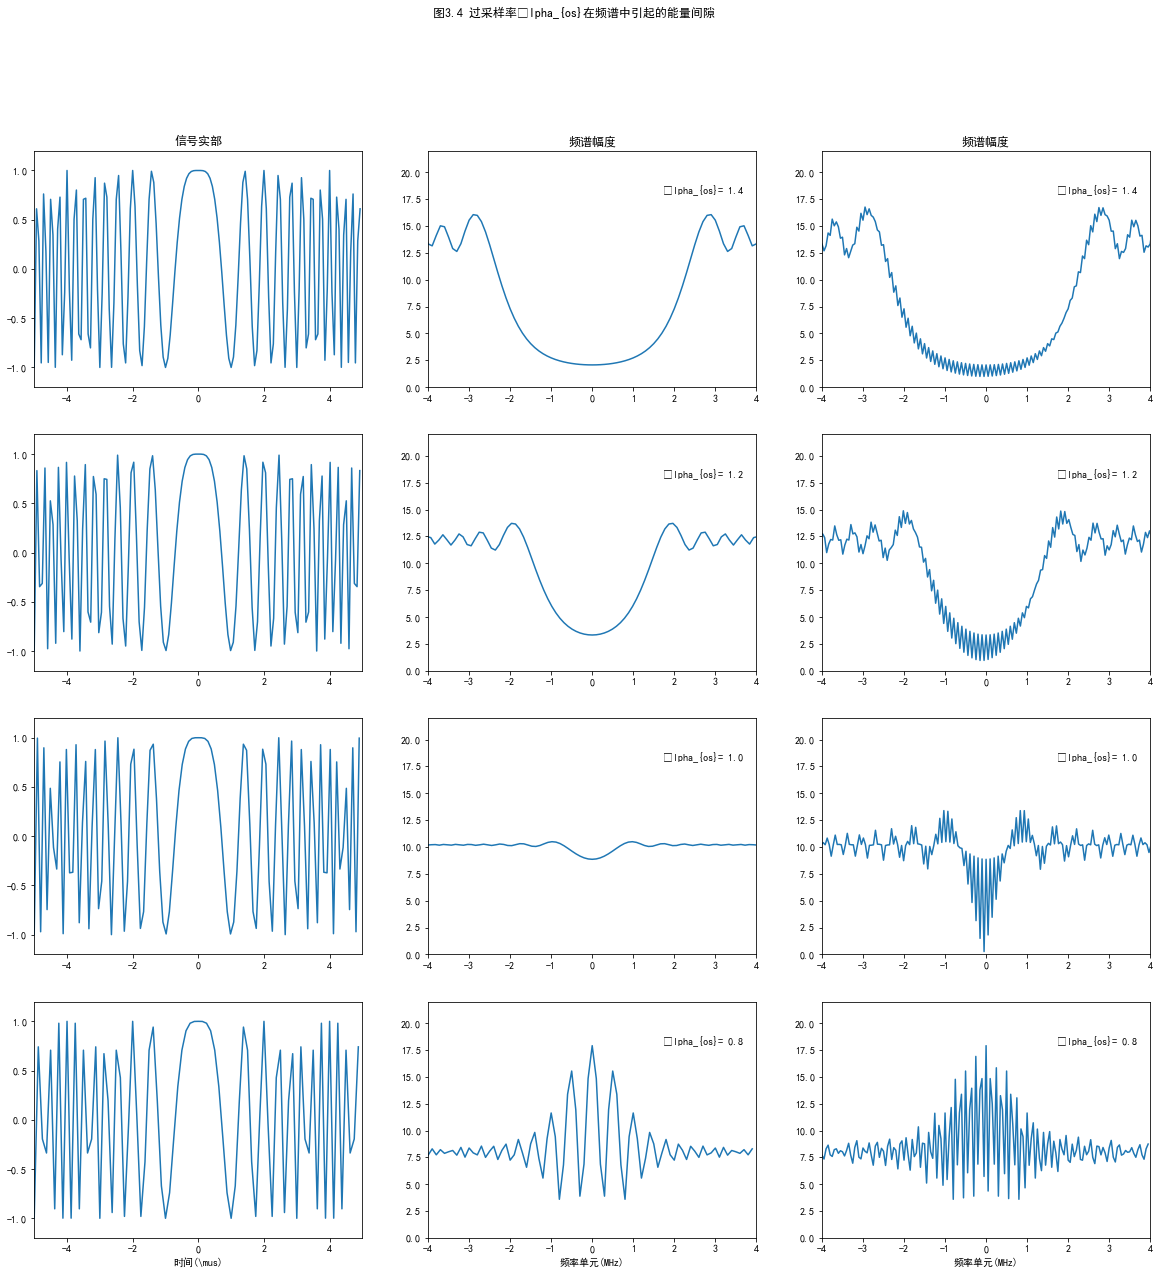

In [58]:
from numpy import real,imag,abs,pi
# 参数设置
TBP = 100;             # 时间带宽积
T = 10e-6;             # 脉冲持续时间
alpha_os = [1.4,1.2,1.0,0.8];             # 过采样率

figG = figure(figsize=(20,20))

for i in range(len(alpha_os)):
    # 参数计算
    B = TBP/T;             # 信号带宽
    K = B/T;               # 线性调频频率
    F = alpha_os[i]*B;     # 采样频率
    N = int(2*ceil(F*T/2));     # 采样点数
    dt = T/N;              # 采样时间间隔
    df = F/N;              # 采样频率间隔
    # 变量设置
    t = arange(-T/2,T/2,dt);    # 时间变量
    f = t/T*F;    # 频率变量
    f_zero =arange( -F/2,F/2,F/(2*N));    # 补零后的频率变零
    # 信号表达
    st = exp(1j*pi*K*t**2)               # Chirp信号复数表达式
    Sf1 = fft(fftshift(st));              # Chirp信号频谱表达式
    # 如果需要在时域补零来得到合适的 变换长度，使信号与滤波器等长，或者扩大
    # 频谱的样本空间，则补零必须在序列的一端进行，补零区的选择会影响频谱相位。
    z =zeros(f_zero.size-st.size)
    st_zero = concatenate((st,z),dtype=complex,axis=None)            # Chirp信号补零表达式
    Sf2 = fft(fftshift(st_zero));         # Chirp信号补零后的频谱表达式
    # 绘图

    subplot(4,3,3*i+1)
    plot(t*1e+6,real(st))
    axis([-5,5,-1.2,1.2])
    if(i==0):
        title('信号实部')
    if(i==3):
        xlabel('时间(\mus)')

    subplot(4,3,3*i+2);
    plot(f*1e-6,abs(Sf1))
    axis([-4,4,0,22])
    if(i==0):
        title('频谱幅度')

    if(i==3):
        xlabel('频率单元(MHz)')

    text(2.7,18,'\alpha_{os}= '+str(alpha_os[i]),horizontalalignment='center')

    
    subplot(4,3,3*i+3)
    plot(f_zero*1e-6,abs(Sf2))
    axis([-4,4,0,22])
    if(i==0):
        title('频谱幅度')

    if(i==3):
        xlabel('频率单元(MHz)')

    text(2.7,18,'\alpha_{os}= '+str(alpha_os[i]),horizontalalignment='center')

suptitle('图3.4 过采样率\alpha_{os}在频谱中引起的能量间隙')